# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [91]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

## Data Overview

- Observations
- Sanity checks

In [117]:
# importing the dataset
df = pd.read_csv("ExtraaLearn.csv")
# overview of the data
df.head()


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [118]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [119]:
#more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

- mostly categorical data with some numeric values

In [120]:
#statistics on  numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


- no significant outliers seen

In [121]:
#checking for missing values
df.isnull().sum()


ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

- no missing values

In [122]:
# checking for "0" values
zero_counts = (df == 0).sum()

print("Number of '0' values in each column:")
print(zero_counts)


Number of '0' values in each column:
ID                          0
age                         0
current_occupation          0
first_interaction           0
profile_completed           0
website_visits            174
time_spent_on_website     174
page_views_per_visit      181
last_activity               0
print_media_type1           0
print_media_type2           0
digital_media               0
educational_channels        0
referral                    0
status                   3235
dtype: int64


- some leads did not result in any website visits, time spent on website, but this is valuable information so should be kept
- some entries have 0 pages visited, but non 0 website visits, which looks like inaccurate information. Will be addressed in the pre-processing step.

In [123]:
# shape of the dataframe
df.shape

(4612, 15)

In [124]:
# number of unique values for each feature
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

- most categorical features have 2 unique values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

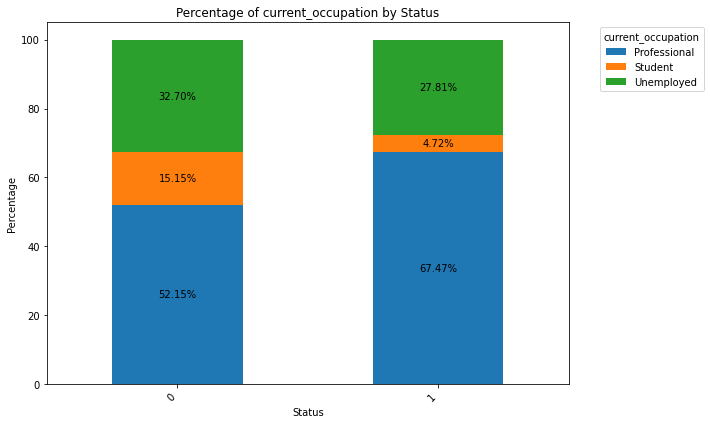

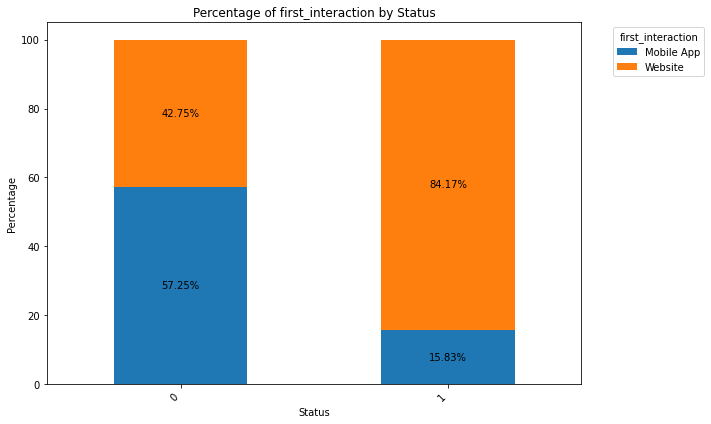

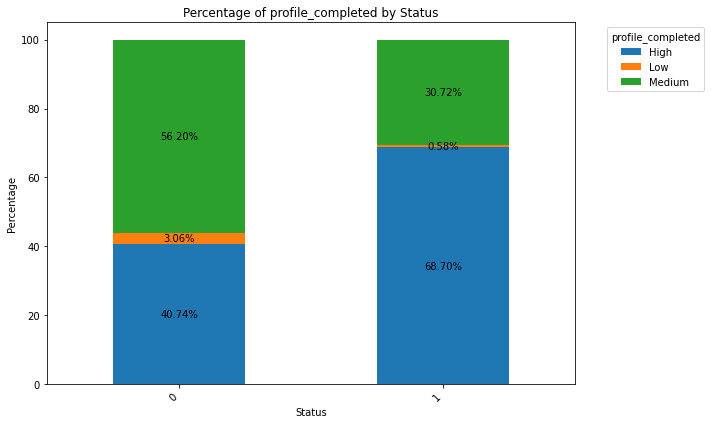

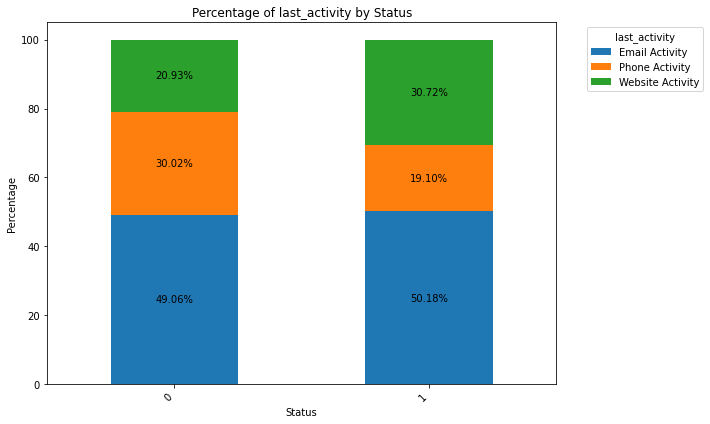

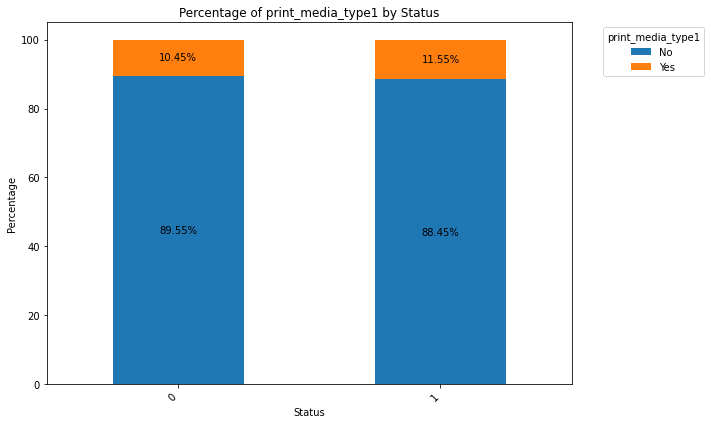

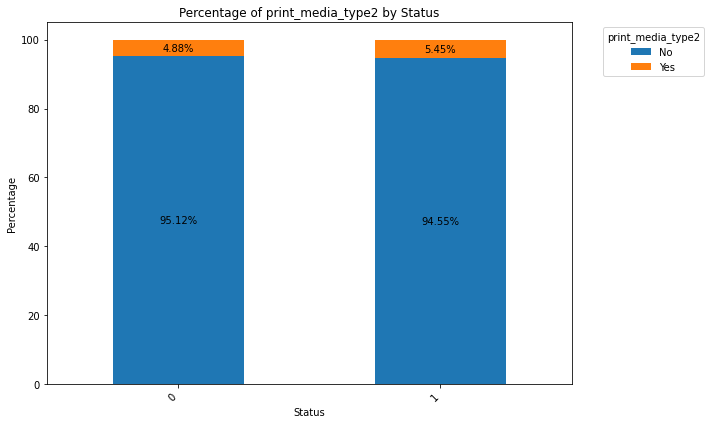

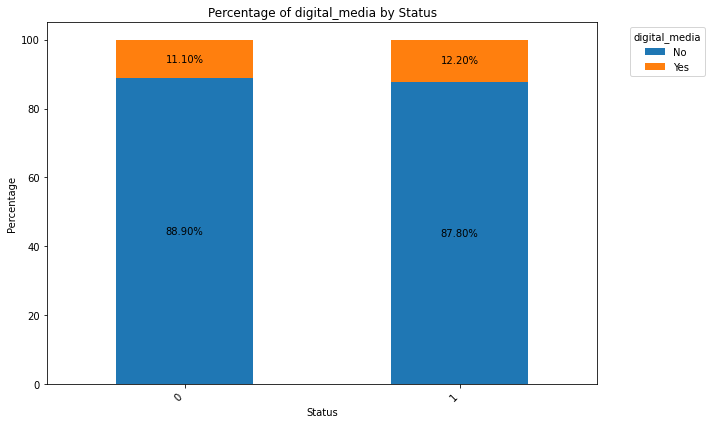

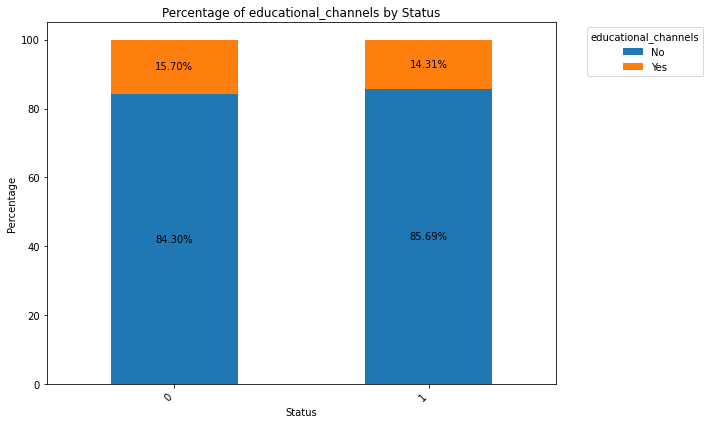

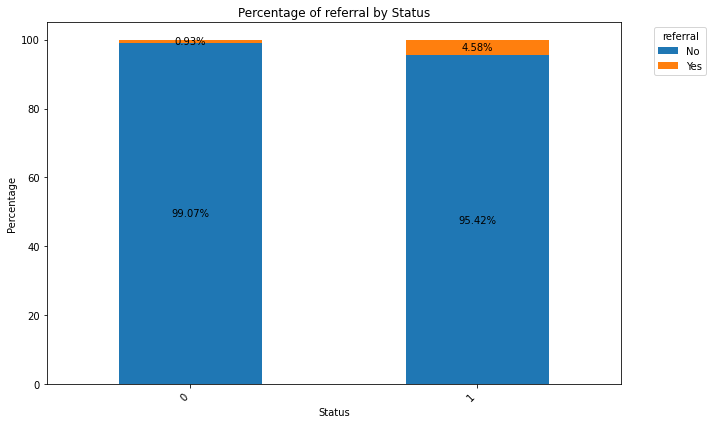

In [125]:
#plot categorical column influence on status
columns_to_plot = ['current_occupation', 'first_interaction',
                   'profile_completed', 'last_activity', 'print_media_type1',
                   'print_media_type2', 'digital_media', 'educational_channels',
                   'referral']

# Loop through each column
for column in columns_to_plot:
    # Skip 'status' column as it's grouping column
    if column == 'status':
        continue
    
    # Grouping by 'status' and the current column, then counting occurrences
    column_counts = df.groupby(['status', column]).size().unstack(fill_value=0)
    
    # Calculate percentages
    column_percentages = column_counts.div(column_counts.sum(axis=1), axis=0) * 100
    
    # Plotting
    ax = column_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.xlabel('Status')
    plt.ylabel('Percentage')
    plt.title(f'Percentage of {column} by Status')
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    
    # Annotating bars with percentages
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')
    
    plt.tight_layout()
    plt.show()


- Students are less and professionals are more likely to convert as expected

- Customers from website first interaction are much more likely to convert, website activity also tends to be the more common in the converted cusotmers

- High profile completion also adds to more conversions meaning that having more details completed on lead's profile increase the chances of conversion


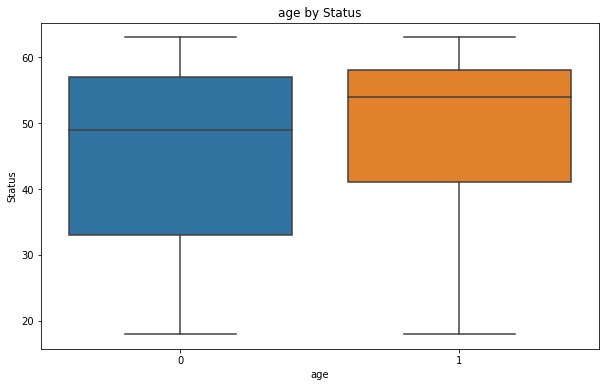

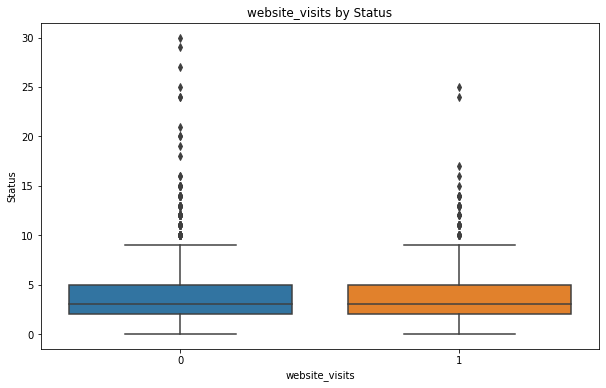

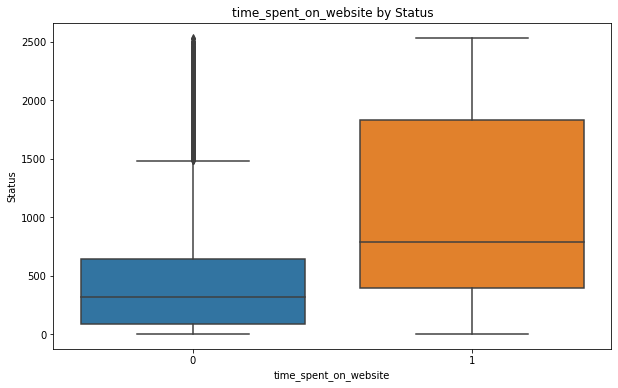

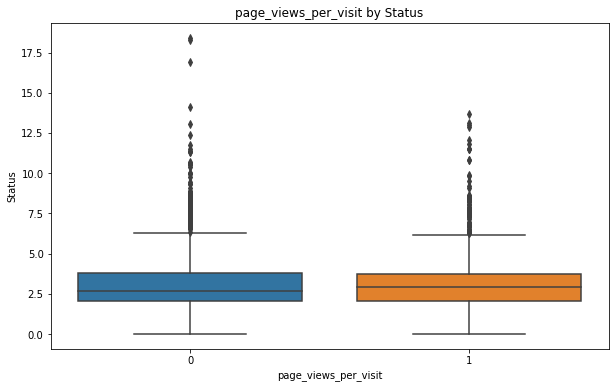

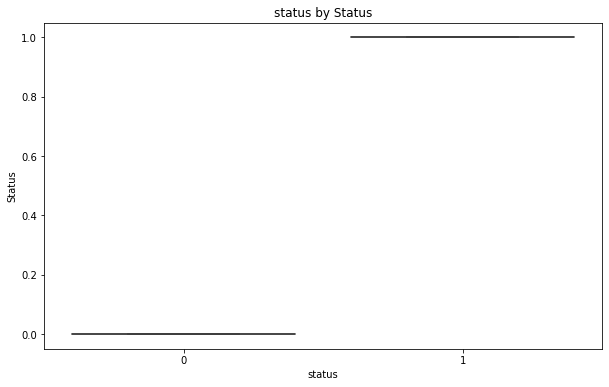

In [126]:
#plot numeric column distributions by status
# Define the hist_box() function
def hist_box(data, col, status_col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=status_col, y=col)
    plt.title(f"{col} by Status")
    plt.xlabel(col)
    plt.ylabel("Status")
    plt.show()

numeric_columns = df.select_dtypes(include=['int','float'])

# Plot boxplots for each numeric variable and each status value
for column in numeric_columns.columns:
    hist_box(df, column, 'status')

-  older people seem to have more conversions
-  people who are converting are also likely to spend more time on the website
- some outlier values in page views per visit and website visits but these are likely correct entries so will not be altered

In [127]:
# Defining the hist_box() function to check for general numeric column distributions and better check for outliers
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

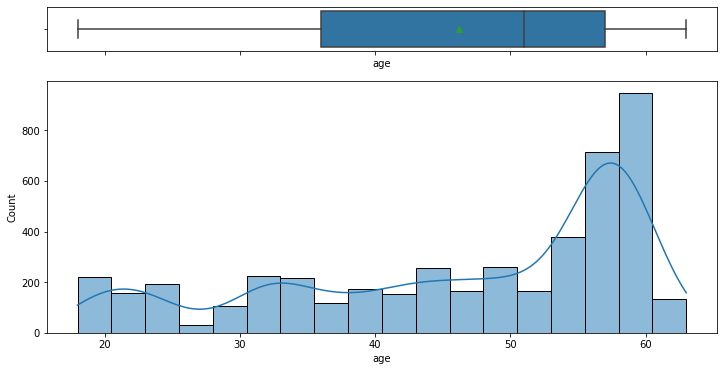

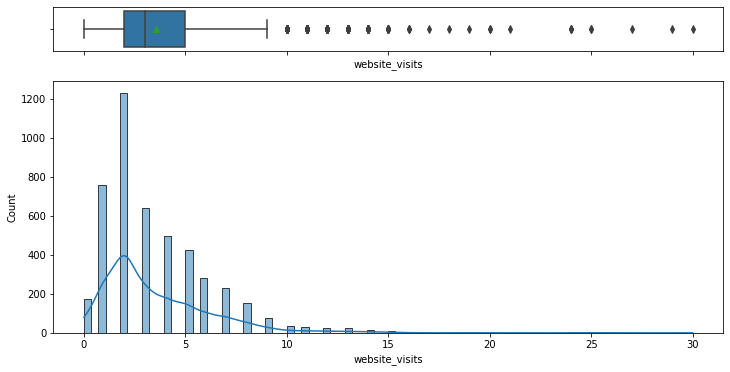

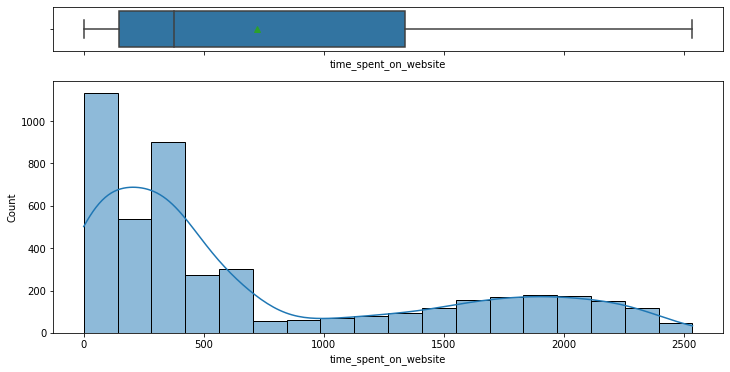

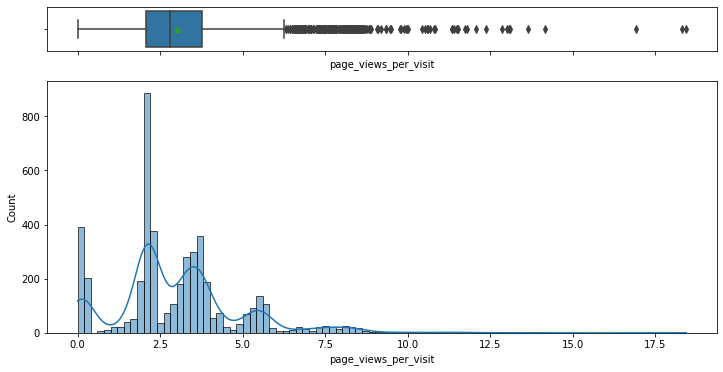

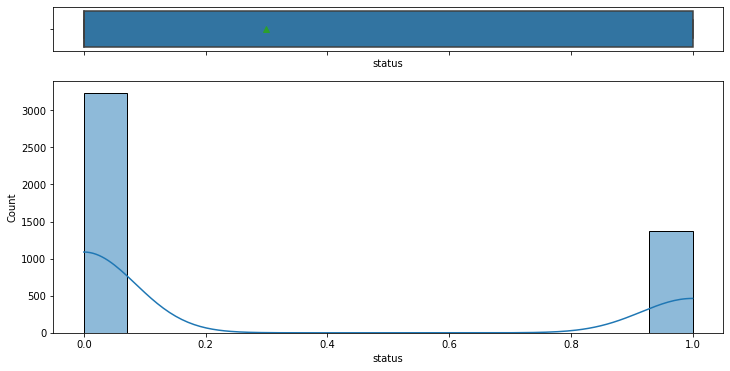

In [128]:
# Plot overlapping boxplots for each numeric variable and each status value
for column in numeric_columns.columns:
    hist_box(df, column)

- 'Age' exhibits a left-skewed distribution, indicating that there are more values from older people samples. No outliers are present here.

- 'Website visits' display a highly right-skewed distribution with a significant number of outliers, exceeding 10 website visits. The majority of data points fall between 0 and 5 website visits.

- 'Time spent on website' primarily ranges from 0 to 500, but there is a secondary peak around 2000. This could potentially represent distributions from two different groups, creating a long right tail. However, no outliers are evident.

- 'Page views per visit' are heavily right-skewed, with the majority of values concentrated around 2.5.


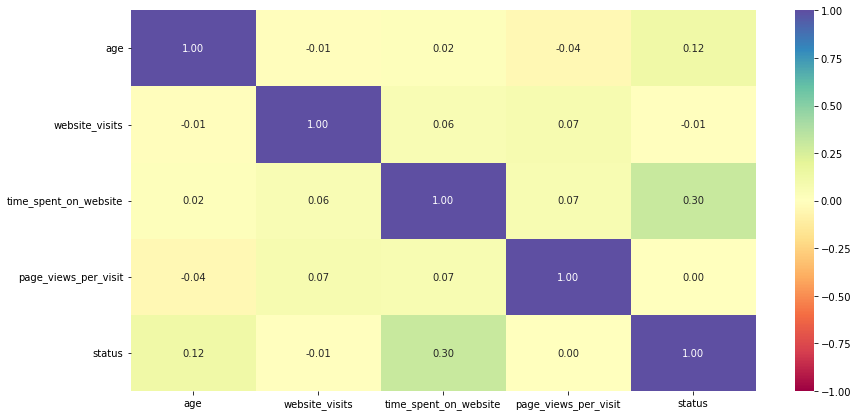

In [129]:
#plot correlation matrix for numeric features
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(14, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- status has the strongest relationship with time spent on website indicating that this may be the most important feature in predicting the status
- no multicollinearity seems to be present

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [130]:
#dropping ID column as it adds no value
df = df.drop(["ID"], axis=1)

In [131]:
#checking datatypes in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [132]:
#Let's remove rows where page views are 0 but time spent on website is not 0 as these seem like invalid entries
df = df[~((df['time_spent_on_website'] != 0) & (df['page_views_per_visit'] == 0))]

In [133]:
# checking for "0" values again
zero_counts = (filtered_df == 0).sum()

print("Number of '0' values in each column:")
print(zero_counts)


Number of '0' values in each column:
ID                         0
age                        0
current_occupation         0
first_interaction          0
profile_completed          0
website_visits           174
time_spent_on_website    174
page_views_per_visit     174
last_activity              0
print_media_type1          0
print_media_type2          0
digital_media              0
educational_channels       0
referral                   0
status                   142
dtype: int64


In [134]:
#checking datatypes in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4605 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4605 non-null   int64  
 1   current_occupation     4605 non-null   object 
 2   first_interaction      4605 non-null   object 
 3   profile_completed      4605 non-null   object 
 4   website_visits         4605 non-null   int64  
 5   time_spent_on_website  4605 non-null   int64  
 6   page_views_per_visit   4605 non-null   float64
 7   last_activity          4605 non-null   object 
 8   print_media_type1      4605 non-null   object 
 9   print_media_type2      4605 non-null   object 
 10  digital_media          4605 non-null   object 
 11  educational_channels   4605 non-null   object 
 12  referral               4605 non-null   object 
 13  status                 4605 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 539.6+ KB


In [135]:
# Converting the data type of each categorical variable to 'category'
categorical_columns = ['current_occupation', 'first_interaction',
                   'profile_completed', 'last_activity', 'print_media_type1',
                   'print_media_type2', 'digital_media', 'educational_channels',
                   'referral']
for column in categorical_columns:
    df[column]=df[column].astype('category')

In [136]:
#defining the features dataframe - independent variables
X = df.drop(["status"], axis=1)
#defining the dependent variable to be predicted
Y = df["status"] 

In [137]:
#creating dummies for categorical features
X = pd.get_dummies(X, drop_first=True) 


In [138]:
# Splitting the data for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

## **Model evaluation:**

#### **Possible scenarios of model performance**
- Predicting a lead will convert to a paid customer but they don't - Loss of resources
- Predicting a lead will not convert to a paid customer but they do - Loss of opportunity

#### **Which case is more important?** 
- Predicting the lead will not convert but they do i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when they should be targeted.

#### **How to reduce this loss?**
- The company wants Recall to be maximized to minimize false negatives

### Decision Tree and Random Forest models will be built and compared

## EDA

In [139]:
#inspecting the shapes of datasets after splitting the data

In [140]:
X_train.shape

(3223, 16)

In [141]:
X_test.shape

(1382, 16)

In [142]:
y_train.shape

(3223,)

In [143]:
y_test.shape

(1382,)

## Building a Decision Tree model

In [144]:
# Function to get confusion matrix in a nice format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [145]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2278
           1       1.00      1.00      1.00       945

    accuracy                           1.00      3223
   macro avg       1.00      1.00      1.00      3223
weighted avg       1.00      1.00      1.00      3223



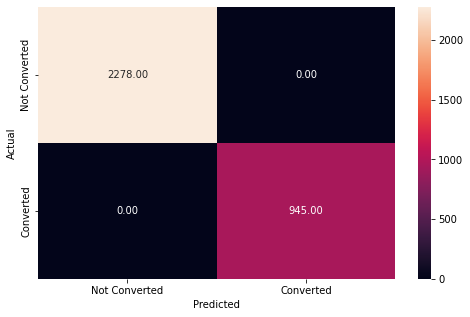

In [146]:
 # Checking performance on the training dataset
pred_train_dt = d_tree.predict(X_train)
metrics_score(y_train, pred_train_dt)

- Model is able to predict the leads who are likely to convert with a recall score of 100%. Overfitting is very likely.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       951
           1       0.69      0.69      0.69       431

    accuracy                           0.80      1382
   macro avg       0.77      0.77      0.77      1382
weighted avg       0.80      0.80      0.80      1382



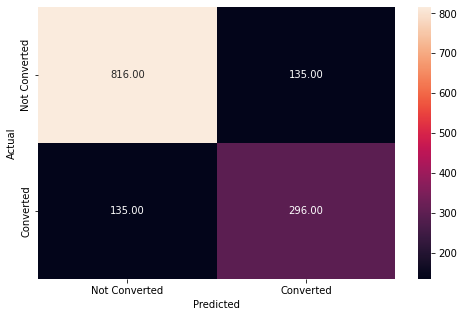

In [147]:
#checking the performance on the test dataset
pred_test_dt = d_tree.predict(X_test)
metrics_score(y_test, pred_test_dt)

 - model is overfitting as the recall score on the test dataset is only 69%

## Hyperparameter Tuning

- hyperparameter tuning will be performed to optimize the model and potentially reduce overfitting

In [148]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=21, max_leaf_nodes=75, min_samples_split=50,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2278
           1       0.81      0.83      0.82       945

    accuracy                           0.89      3223
   macro avg       0.87      0.88      0.87      3223
weighted avg       0.90      0.89      0.90      3223



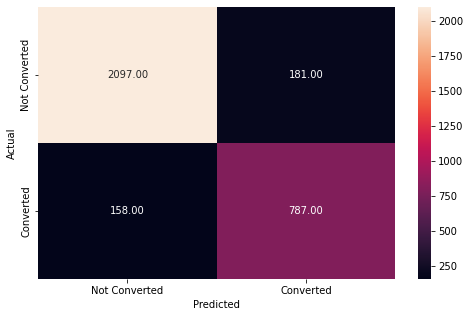

In [149]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

- recall score after tuning dropped to 83% for the traing dataset

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       951
           1       0.74      0.75      0.74       431

    accuracy                           0.84      1382
   macro avg       0.81      0.81      0.81      1382
weighted avg       0.84      0.84      0.84      1382



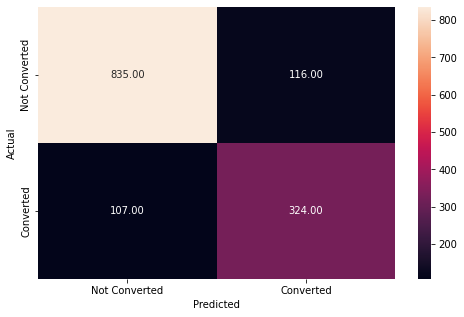

In [150]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

 -  overfitting has been reduced after tuning as recall score on the testing dataset is now 75%. There is still room for improvement as overfitting is still likely present.

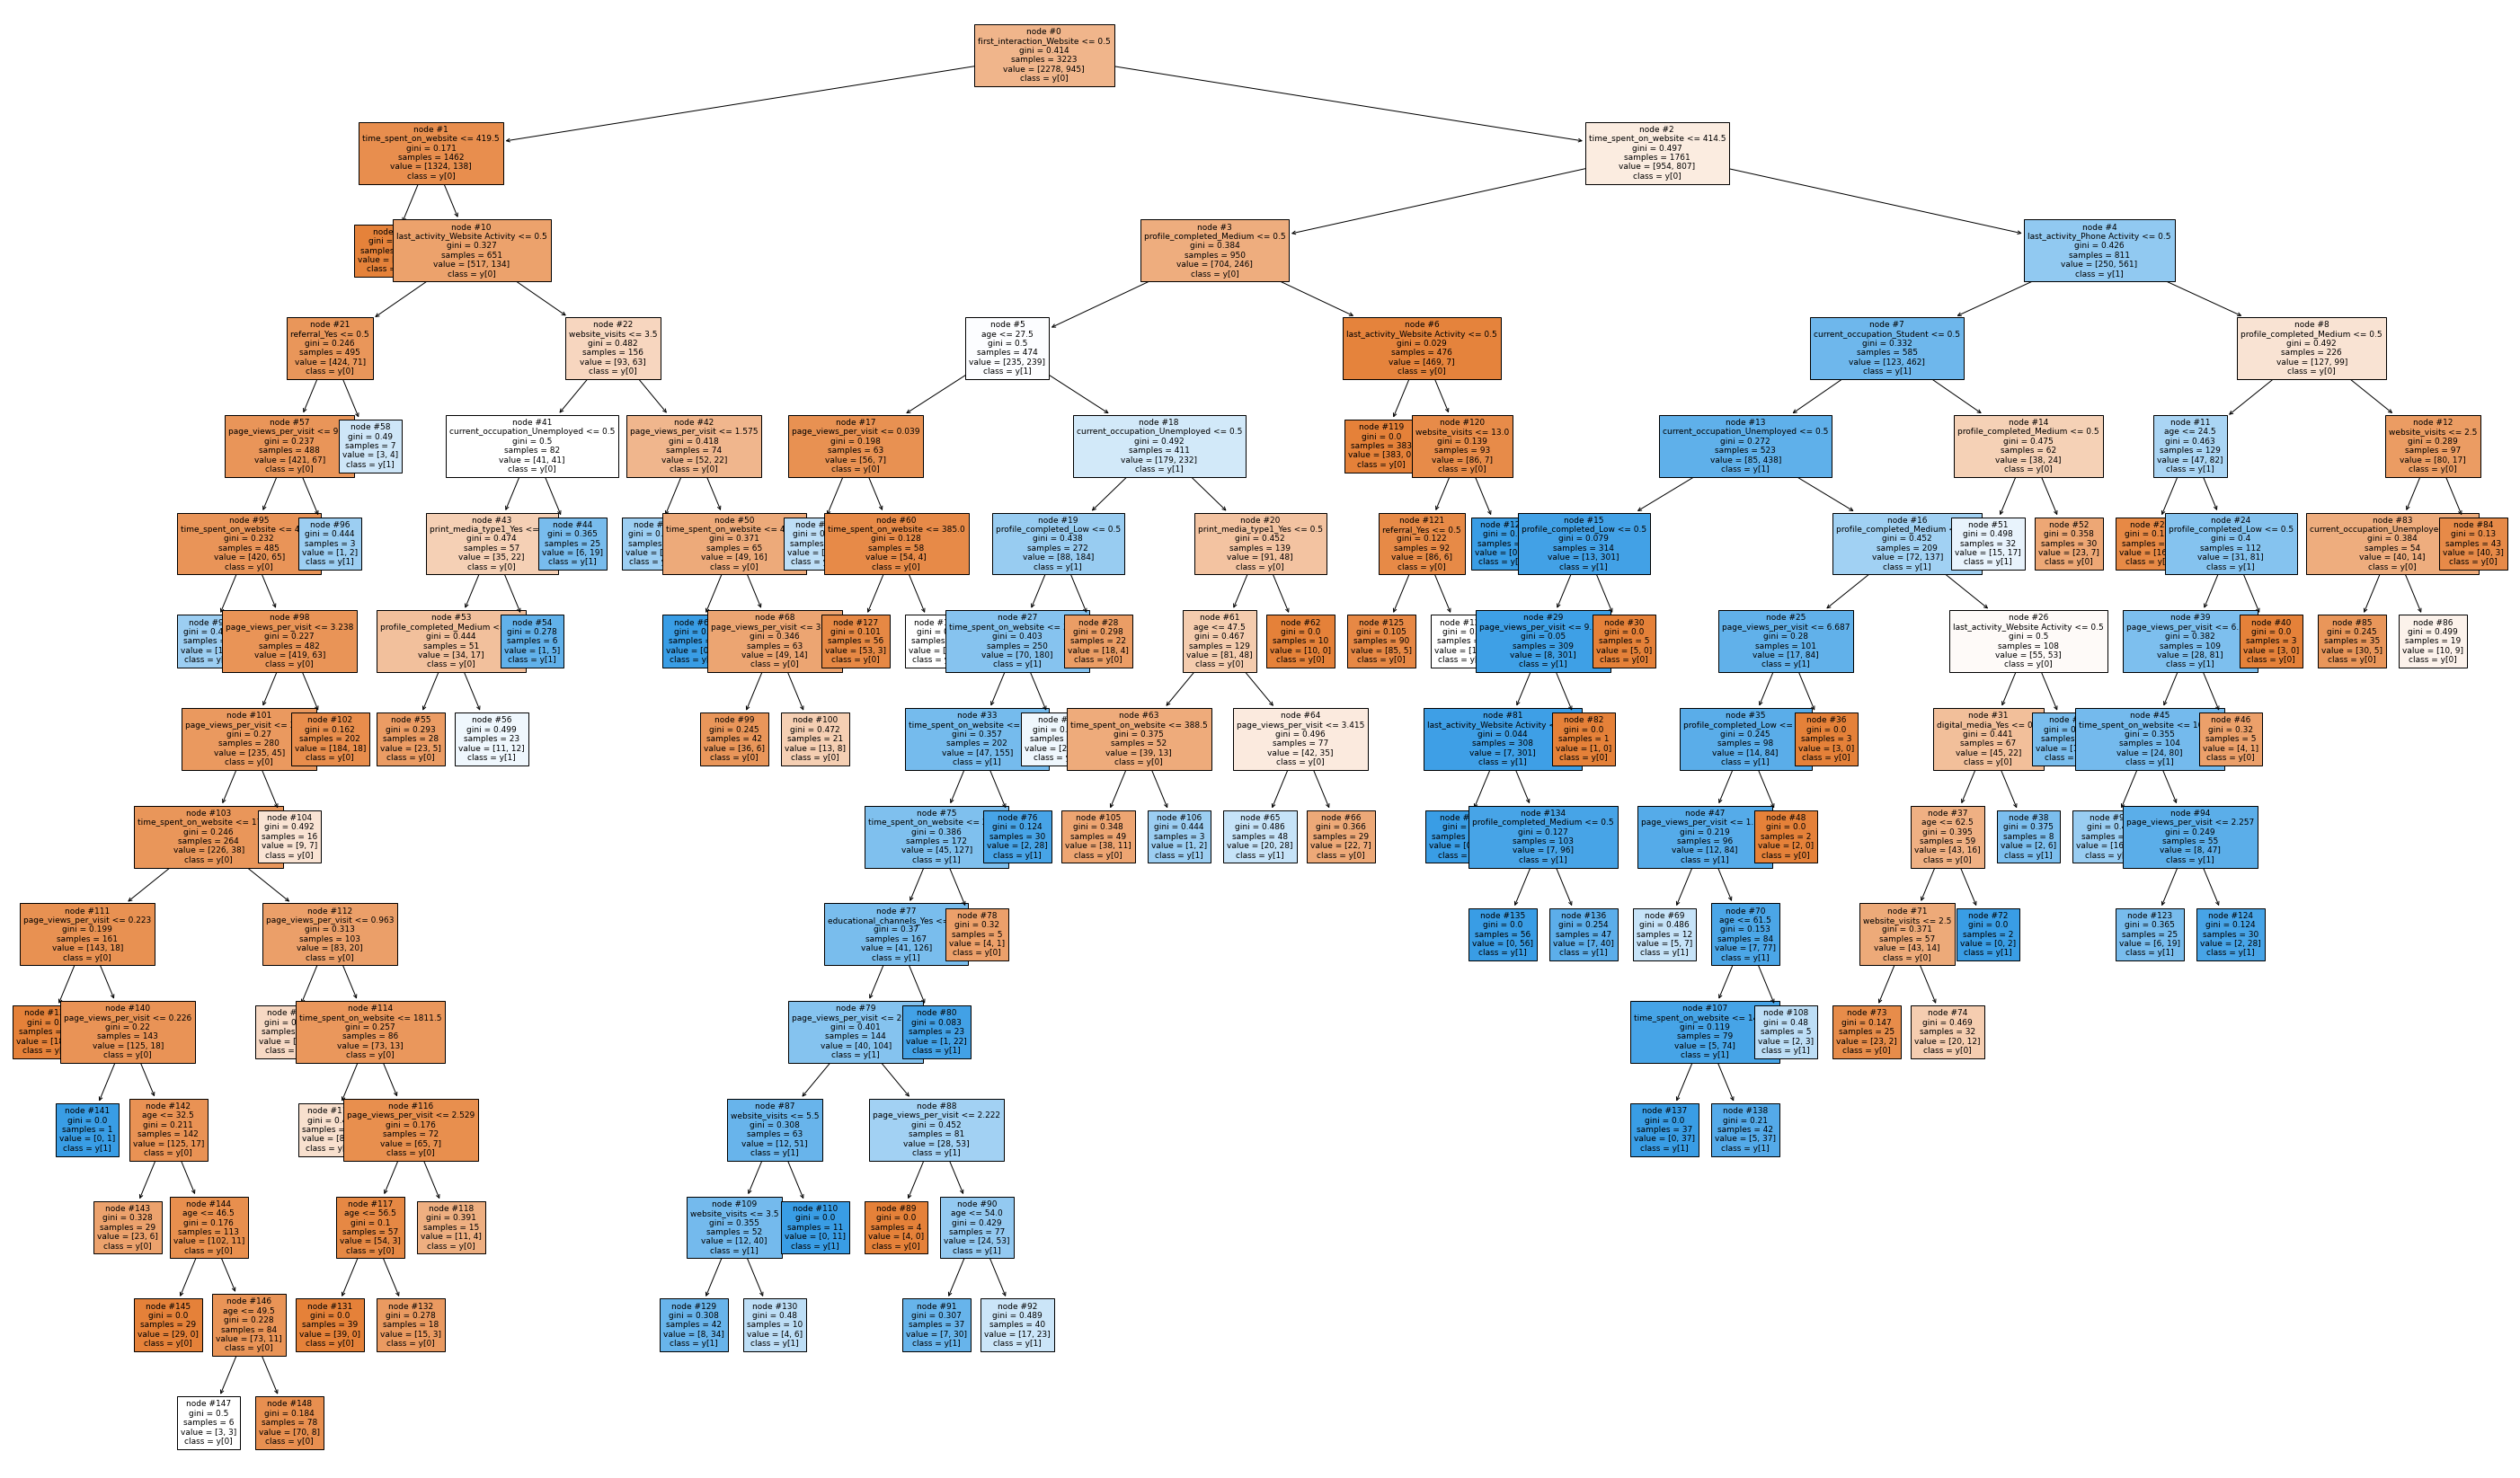

In [151]:
#plotting the tree
features = list(X_train.columns)

plt.figure(figsize = (50, 30))

tree.plot_tree(estimator, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

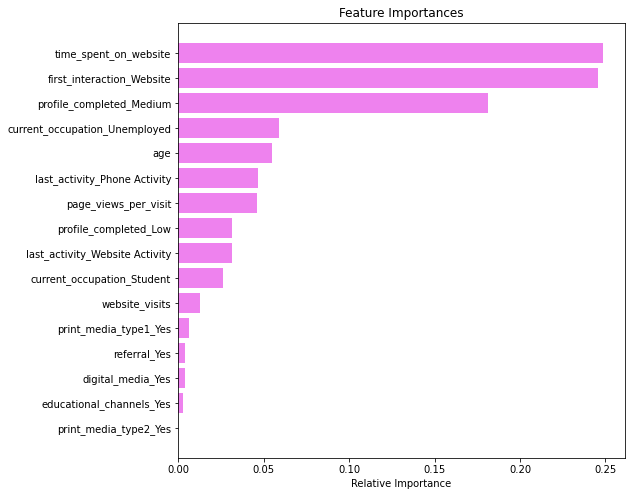

In [152]:
# Importance of features for the tree
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- we observe most important features are time spent on website, website as a first interaction platform and profile being medium completed.
- medium profile completion as an influential variable can be seen from the initial EDA as a a much higher percentage of leads with medium profile completion were not converted than converted.

## Building a Random Forest model

#### RF model to improve performance and reduce overfitting

In [153]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2278
           1       1.00      1.00      1.00       945

    accuracy                           1.00      3223
   macro avg       1.00      1.00      1.00      3223
weighted avg       1.00      1.00      1.00      3223



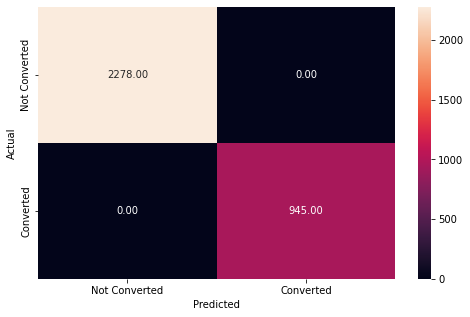

In [154]:
# checking performance of random forest on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

- no errors, model performs really well on the training dataset
- overfitting is likely

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       951
           1       0.78      0.70      0.74       431

    accuracy                           0.85      1382
   macro avg       0.83      0.80      0.81      1382
weighted avg       0.84      0.85      0.84      1382



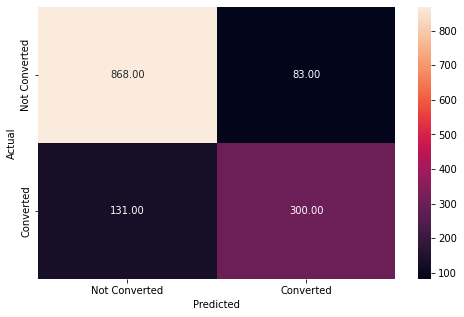

In [155]:
# checking performance of random forest on the test data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

 - recall score is 0.7 which is better than an initial dt model but worse than the tuned dt one
 - model is overfitting

## Hyperparameter Tuning on RF Model

In [156]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }
# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Choose the type of classifier.
rf_estimator_tuned.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2278
           1       0.68      0.88      0.77       945

    accuracy                           0.84      3223
   macro avg       0.81      0.85      0.82      3223
weighted avg       0.87      0.84      0.85      3223



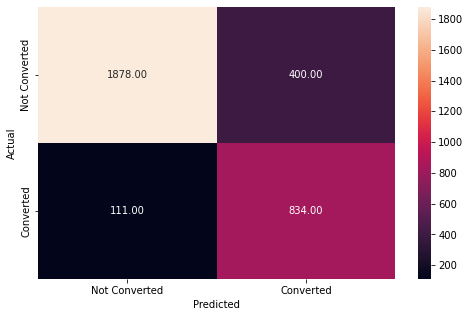

In [157]:
# Checking performance on the training dataset
rf_tuned_y_train = rf_estimator_tuned.predict(X_train)
metrics_score(y_train,rf_tuned_y_train)

- recall score dropped to 0.88 on the training dataset

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       951
           1       0.68      0.85      0.75       431

    accuracy                           0.83      1382
   macro avg       0.80      0.83      0.81      1382
weighted avg       0.85      0.83      0.83      1382



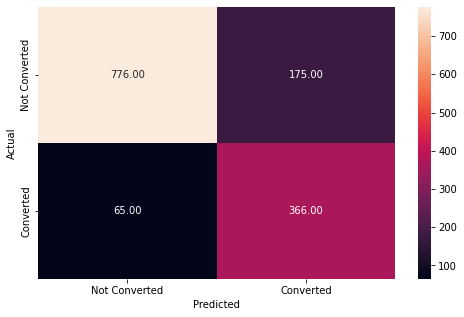

In [158]:
# Checking performance on the test dataset
rf_tuned_y_test = rf_estimator_tuned.predict(X_test)
metrics_score(y_test,rf_tuned_y_test)

- recall score on the testing dataset reached 85% which is much better than the dt model


<Axes: title={'center': 'Feature Importances'}, xlabel='Importance'>

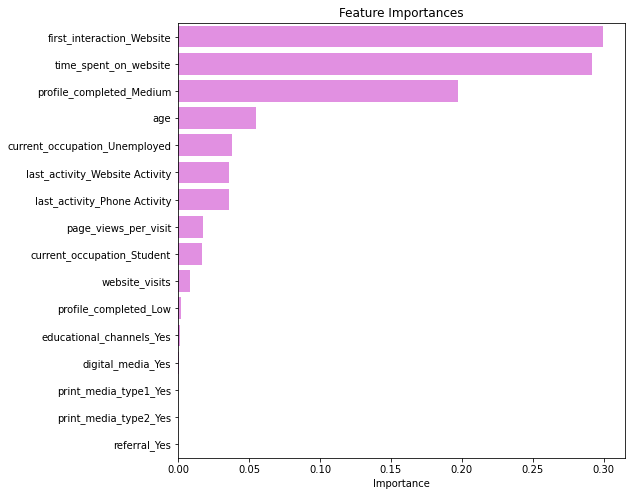

In [159]:
#check feature importances for RF model
importances = rf_estimator_tuned.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

- The top three influential features remained consistent, yet the website, serving as the primary interaction platform, surged to the forefront. This suggests that individuals discovering ExtraaLearn via the website were most likely to convert, making it the most influential attribute in our final model.

## Actionable Insights and Recommendations

- Various classification models have been constructed, fine-tuned, and evaluated. The model achieving the highest accuracy was the fine-tuned Random Forest model, with a recall score of 85% on the testing dataset.
- In this business context, recall holds greater importance to mitigate false negatives and potential loss of customers. Hence, this model should be prioritized.
- Variables that proved to be the most influential in lead conversion process are whether peoples first interaction with Extraalearn was through their website or not, time spent on the website and if their profile was medium completed. 
- Based on the aforementioned points, the key takeaways for the business include prioritizing website interactions over mobile app interactions, encouraging users to complete their profiles on the platform, and investing in strategies to prolong users' time spent on the website. These factors enhance the likelihood of lead conversion. Additionally, targeting older and employed individuals is advisable.
